### Данные:

In [1]:
LData = Import["IMU_1_2.txt", "Data"];

In [2]:
Dimensions[Transpose[Transpose[LData][[1;;7]]]]

{78904, 7}

In [3]:
DataB = Transpose[LData][[1;;7]];

In [4]:
Dimensions[DataB]

{7, 78904}

In [5]:
Data = {}

{}

In [6]:
For[i = 1, i < Dimensions[DataB][[2]]/10, i++, AppendTo[Data, 
                                                        {Mean[DataB[[1]][[((i-1)*10+1);;10*(i)]]],
                                                         Mean[DataB[[2]][[((i-1)*10+1);;10*(i)]]],
                                                         Mean[DataB[[3]][[((i-1)*10+1);;10*(i)]]],
                                                         Mean[DataB[[4]][[((i-1)*10+1);;10*(i)]]],
                                                         Mean[DataB[[5]][[((i-1)*10+1);;10*(i)]]],
                                                         Mean[DataB[[6]][[((i-1)*10+1);;10*(i)]]],
                                                         Mean[DataB[[7]][[((i-1)*10+1);;10*(i)]]]}]];

31897.         0.0796552      0.0359945      9.81418        0.000163007
 

>    0.00210398     -0.000489154

                                                                      -6
31897.         0.0796159      0.083286       9.81803        1.03274 10
 

>    0.00194199     -0.00048887


31897.1        0.0796646      0.0360099      9.81813        -0.000322704
 

>    0.00194131     -0.000812617

                                                                      -7
31897.1        0.0796391      0.0359614      9.80629        8.99304 10
 

>    0.00161799     -0.000650231

                                                                      -7
31897.1        0.0796525      0.0359913      9.81418        6.10036 10
 

>    0.00113277     -0.000325647
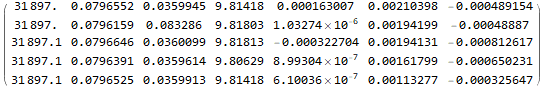

In [7]:
Data[[1;;5]] // MatrixForm

In [8]:
Dimensions[Data]

{7890, 7}

### Измерения акселерометров:
\begin{eqnarray*}
f' = \left( \begin{array}{c}
         f_{1}' \cr
          f_{2}'  \cr
          f_{3}'
        \end{array} \right) =
\left( \begin{array}{c}
         f_{X}' \cr
          f_{Y}'  \cr
          f_{Z}'
        \end{array} \right)
        =
        \left( \begin{array}{c}
         f_{z_1} \cr
          f_{z_2}  \cr
          f_{z_3}
        \end{array} \right) +
 \left( \begin{array}{c}
         \Delta f^0_{1} \cr
         \Delta f^0_{2} \cr
         \Delta f^0_{3}
  \end{array} \right)
+
 \left( \begin{array}{c}
         \Delta f^s_{1} \cr
         \Delta f^s_{2} \cr
         \Delta f^s_{3}
\end{array} \right)
.
\end{eqnarray*}

здесь:
$\Delta f^0_{i} $  -- суммарные систематические погрешности акселерометров. <br>
$\Delta f^s_{i} $ -- случайные, шумовые погрешности.<br>
$f_{z_i},\, i = 1,2,3$ -- полезный сигнал акселерометров в осях $Mr$.

In [9]:
fData = Transpose[Transpose[Data][[2;;4]]];

0.0796552   0.0359945   9.81418

0.0796159   0.083286    9.81803

0.0796646   0.0360099   9.81813

0.0796391   0.0359614   9.80629

0.0796525   0.0359913   9.81418
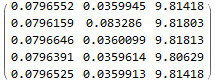

In [10]:
fData[[1;;5]] // MatrixForm

Определние среднего значения  $g'$
$$g'=\sqrt{\sum_{i=1}^{3} f'^2_i}  $$

In [11]:
ValuesG = {};

In [12]:
For[i = 1, i <= Dimensions[fData][[1]], i++, AppendTo[ValuesG, Sqrt[fData[[i]][[1]]^2+fData[[i]][[2]]^2+fData[[i]][[3]]^2]]]

9.81457

9.81871

9.81851

9.80668

9.81457
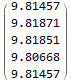

In [13]:
ValuesG[[1;;5]] // MatrixForm

Среднее значение  ${\widetilde g}$

In [14]:
meanG = Mean[ValuesG]

9.81603

Определение среднего значения ${\widetilde f}_{i} $
$$ {\widetilde f}_{i}=\sum_{K=1}^{N} f'^2_i(t_k), i=1,2,3  $$

In [15]:
meanF = {};

In [16]:
For[i = 1, i <= Dimensions[fData][[2]], i++, AppendTo[meanF, Mean[Transpose[fData][[i]]]]]

 Вычислим средние значения показаний акселерометров:
$$
\begin{eqnarray*}
{\widetilde f}_{i}  &=& \frac{ \sum\limits_{k=1}^N f'_{i}(k) }{N},
\qquad (i=1,2,3).
\end{eqnarray*}
$$

In [17]:
meanF 

{0.0751433, 0.0449985, 9.8156}

 Определение угла тангажа $\vartheta$.
$$
\begin{eqnarray*}
f_{z} =
\left( \begin{array}{c}
  f_X \cr
f_Y\cr
f_Z
\end{array} \right) =
g\left( \begin{array}{c}
  \sin \vartheta \cr
\phantom{-} \cos \vartheta \cos \gamma \cr
- \cos \vartheta \sin \gamma
\end{array} \right) \Rightarrow
\widetilde{\vartheta} =  \arctan \left(\frac{\widetilde{f}_{X}}{
\sqrt{\widetilde{f}^2_{Y}+\widetilde{f}^2_{Z}}} \right).
\end{eqnarray*}
$$

Используя информацию о модельном значении $g'$ ускорения силы тяжести. Тогда
\begin{eqnarray*}
\widetilde{\vartheta} =  \arcsin\left( \frac{\widetilde{f}_{X}}{g'}\right).
\end{eqnarray*}


In [18]:
Thetaf = ArcSin[meanF[[1]]/meanG]

0.00765523


Определение  угла крена
\begin{eqnarray*}
f_{z} =
\left( \begin{array}{c}
  f_X \cr
f_Y\cr
f_Z
\end{array} \right) =
g\left( \begin{array}{c}
  \sin \vartheta \cr
\phantom{-} \cos \vartheta \cos \gamma \cr
- \cos \vartheta \sin \gamma
\end{array} \right) \Rightarrow \widetilde{\gamma} =  - \arctan\left( \frac{\widetilde{f}_{Z}}{\widetilde{f}_{Y}}
\right).
\end{eqnarray*}


Используя информацию о модельном значении $g'$ ускорения силы тяжести. Тогда
\begin{eqnarray*}
\widetilde{\gamma} =  - \arcsin\left( \frac{\widetilde{f}_{Z}}{g' \cos
\widetilde \vartheta} \right).
\end{eqnarray*}

In [19]:
Gammaf = -ArcSin[meanF[[3]]/(meanG*Cos[Thetaf])]

-1.56535

Представим матрицу $\widetilde L$ "по столбцам":
$\widetilde L =(\widetilde l_1,\widetilde l_2,\widetilde l_3 )^T$.

Имеем (третий столбец)
\begin{eqnarray*}
l_3 =
 \left( \begin{array}{c}
 \sin \vartheta \cr
 \phantom{-} \cos \vartheta \cos \gamma \cr
 - \cos \vartheta \sin  \gamma
\end{array} \right) \Longrightarrow
\widetilde l_3 =
 \left( \begin{array}{c}
 \widetilde l_{13} \cr
 \widetilde l_{23} \cr
 \widetilde l_{33}
\end{array} \right)
=
 \left( \begin{array}{c}
 \sin \widetilde \vartheta \cr
 \phantom{-} \cos \widetilde \vartheta \cos \widetilde \gamma \cr
 - \cos \widetilde
\vartheta \sin \widetilde \gamma
\end{array} \right),
\end{eqnarray*}

In [20]:
l3 = {Sin[Thetaf], Cos[Thetaf]*Cos[Gammaf], -Cos[Thetaf]*Sin[Gammaf]}

{0.00765516, 0.00544688, 0.999956}

### Измерения ДУС:
\begin{eqnarray*}
\omega' = \left( \begin{array}{c}
         \omega_{1}' \cr
          \omega_{2}'  \cr
          \omega_{3}'
        \end{array} \right) =
\left( \begin{array}{c}
         \omega_{X}' \cr
          \omega_{Y}'  \cr
          \omega_{Z}'
        \end{array} \right)
        =
        \left( \begin{array}{c}
         \omega_{z_1} \cr
          \omega_{z_2}  \cr
          \omega_{z_3}
        \end{array} \right) -
\underbrace{        \left[
 \left( \begin{array}{c}
         \nu^0_{1} \cr
         \nu^0_{2} \cr
         \nu^0_{3}
  \end{array} \right)
+
 \left( \begin{array}{c}
         \nu^s_{1} \cr
         \nu^s_{2} \cr
         \nu^s_{3}
\end{array} \right)
\right]}_{\nu_z}
.
\end{eqnarray*}

здесь: 
 $\nu_{z}$ -- суммарный дрейф ДУС; <br>
 $\nu^0_{i}$ -- суммарные систематические погрешности ДУС, к которым добавляются случайные, шумовые погрешности $\nu^s_{i}$.


In [21]:
wData = Transpose[Transpose[Data][[5;;7]]];

0.000163007    0.00210398     -0.000489154

          -6
1.03274 10     0.00194199     -0.00048887


-0.000322704   0.00194131     -0.000812617

          -7
8.99304 10     0.00161799     -0.000650231

          -7
6.10036 10     0.00113277     -0.000325647
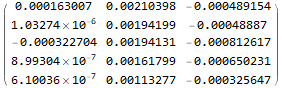

In [22]:
wData[[1;;5]] // MatrixForm

Вычислим средние значения показаний ДУС
$\widetilde \omega =(\widetilde \omega_{X}, \widetilde \omega_{Y},
\widetilde \omega_{Z})^T$:
\begin{eqnarray*}
{\widetilde \omega}_{i}  &=& \frac{ \sum\limits_{k=1}^N \omega'_{i}(k) }{N},
\qquad (i=1,2,3).
\end{eqnarray*}


In [23]:
meanW = {};

In [24]:
For[i = 1, i <= Dimensions[wData][[2]], i++, AppendTo[meanW, Mean[Transpose[wData][[i]]]]]

Среднее значение  $\widetilde \omega$

In [25]:
meanW 

{0.0000186009, -0.0000435642, 0.0000608988}

Угловая скорость вращения земли:

In [26]:
u = 7.2921157*10^(-5)

0.0000729212

Спроектируем на оси $Mx$ средние значения $\widetilde \omega$ показаний ДУС
\begin{eqnarray*}
{\widetilde \omega}_x =
\underbrace{\left(
\begin{array}{ccc}
0 & \sin \widetilde \gamma  &   \cos \widetilde \gamma \cr
\cos \widetilde \vartheta  & -  \sin \widetilde \vartheta
\cos \widetilde \gamma &  \phantom{-}  \sin \widetilde\vartheta \sin \widetilde \gamma \cr
\sin \widetilde \vartheta &  \phantom{-} \cos \widetilde\vartheta
\cos \widetilde \gamma &  -\cos \widetilde \vartheta \sin \widetilde \gamma
\end{array} \right)}_{\widetilde B_{xr}} \widetilde \omega.
\end{eqnarray*}


In [27]:
Bxr = {{0, Sin[Gammaf], Cos[Gammaf]},
        {Cos[Thetaf], -Sin[Thetaf]*Cos[Gammaf], Sin[Thetaf]*Sin[Gammaf]},
        {Sin[Thetaf], Cos[Thetaf]*Cos[Gammaf], -Cos[Thetaf]*Sin[Gammaf]}};

In [28]:
wx = Bxr.meanW 

{0.0000438953, 0.0000181359, 0.0000608012}

Тогда\begin{eqnarray*}
\widetilde \omega_x = \left(
\begin{array}{c}
- u \cos \widetilde \varphi \sin \widetilde \psi \cr
\phantom{-} u \cos \widetilde \varphi \cos \widetilde \psi \cr
u \sin \widetilde \varphi
\end{array}
\right) \Longrightarrow
\widetilde  \psi = -\arctan\frac{{\widetilde \omega}_{x_1}}{{\widetilde \omega}_{x_2}} , \quad
\widetilde \varphi = \arctan \left( \frac{{\widetilde \omega}_{x_3}}{\sqrt{{\widetilde \omega}^2_{x_1}+{\widetilde \omega}^2_{x_2}}} \right).
\end{eqnarray*}

In [29]:
Psiw = -ArcTan[wx[[1]], wx[[2]]]

-0.391803

In [30]:
Phiw = ArcTan[wx[[3]], Sqrt[wx[[1]]^2+wx[[1]]^2]]

0.795783

### Результаты в градусах:

##### Географическая широта места $\widetilde \varphi = $

In [31]:
{Floor[Phiw*180/Pi],
 Floor[Mod[Phiw*180/Pi, 1]*60],
 Mod[Mod[Phiw*180/Pi, 1]*60, 1]*60}

{45, 35, 42.0048}

##### Угол истинного курса $ \widetilde \psi = $

In [32]:
{Floor[Psiw*180/Pi],
 Floor[Mod[Psiw*180/Pi, 1]*60],
 Mod[Mod[Psiw*180/Pi, 1]*60, 1]*60}

{-23, 33, 4.90659}

##### Угол крена $\widetilde{\gamma} = $

In [33]:
{Floor[Gammaf*180/Pi],
 Floor[Mod[Gammaf*180/Pi, 1]*60],
 Mod[Mod[Gammaf*180/Pi, 1]*60, 1]*60}

{-90, 18, 43.5382}

##### Угол тангажа $ \widetilde\vartheta = $

In [34]:
{Floor[Thetaf*180/Pi],
 Floor[Mod[Thetaf*180/Pi, 1]*60],
 Mod[Mod[Thetaf*180/Pi, 1]*60, 1]*60}

{0, 26, 19.0053}

### Графики накапливающихся средних значений показаний акселерометров, ДУС, а также соответствующих среднеквадратичных отклонений.

31897.         0.0796552      0.0359945      9.81418        0.000163007
 

>    0.00210398     -0.000489154

                                                                      -6
31897.         0.0796159      0.083286       9.81803        1.03274 10
 

>    0.00194199     -0.00048887


31897.1        0.0796646      0.0360099      9.81813        -0.000322704
 

>    0.00194131     -0.000812617

                                                                      -7
31897.1        0.0796391      0.0359614      9.80629        8.99304 10
 

>    0.00161799     -0.000650231

                                                                      -7
31897.1        0.0796525      0.0359913      9.81418        6.10036 10
 

>    0.00113277     -0.000325647
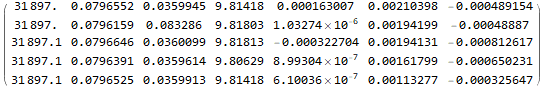

In [35]:
Data[[1;;5]] // MatrixForm

Будем считать что первое измерение происходит в момент времени $t_0=0$

In [36]:
DataGraph = Data;

In [37]:
For[i=2, i <= Dimensions[DataGraph][[1]], i++, DataGraph[[i]][[1]] = Data[[i]][[1]]-Data[[1]][[1]]];
DataGraph[[1]][[1]]=0;

0              0.0796552      0.0359945      9.81418        0.000163007
 

>    0.00210398     -0.000489154

                                                                      -6
0.033334       0.0796159      0.083286       9.81803        1.03274 10
 

>    0.00194199     -0.00048887


0.066668       0.0796646      0.0360099      9.81813        -0.000322704
 

>    0.00194131     -0.000812617

                                                                      -7
0.100002       0.0796391      0.0359614      9.80629        8.99304 10
 

>    0.00161799     -0.000650231

                                                                      -7
0.133336       0.0796525      0.0359913      9.81418        6.10036 10
 

>    0.00113277     -0.000325647
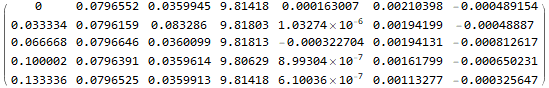

In [39]:
DataGraph[[1;;5]] // MatrixForm

0           0.0796552

0.033334    0.0796159

0.066668    0.0796646

0.100002    0.0796391

0.133336    0.0796525
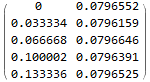

In [40]:
Transpose[Transpose[DataGraph][[{1, 2}]]][[1;;5]] // MatrixForm

In [41]:
List2[col_] := Transpose[Transpose[DataGraph][[{1, col}]]]

### Графики накапливающихся средних значений показаний акселерометров

Вычисление математического ожидания:
\begin{eqnarray*}
\widetilde \mu_0 & =& x_0, \qquad  \qquad  \qquad \ \ j = 0, \qquad  \qquad \ \ n = 1, \nonumber \\
\widetilde \mu_{j} &=& \frac{j \cdot \widetilde \mu_{j-1} + x_{j}}{j+1},\qquad j = 1, 2, \ldots, \qquad  n = j+1.
 \end{eqnarray*}
 

0.0751433 estimate of f1


-Graphics-
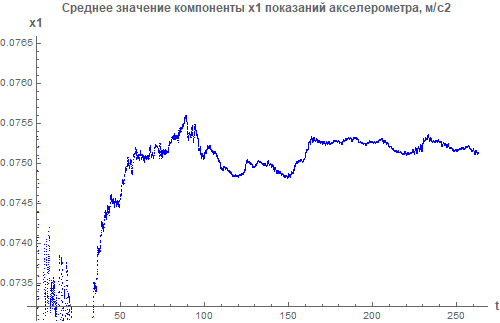

In [42]:
column = 2;
Pointsf1 = {};
Listx1 = List2[column];
AppendTo[Pointsf1, Listx1[[1]]];

For[i=2, 
    i <= Dimensions[DataGraph][[1]], 
    i++, 
    AppendTo[Pointsf1, 
            {Listx1[[i]][[1]], ((i-1)*Pointsf1[[i-1]][[2]]+Listx1[[i]][[2]])/i}]];

Show[ListPlot[Pointsf1, PlotStyle -> Blue,
            PlotLabel -> Style["Среднее значение компоненты x1 показаний акселерометра, м/с2", Bold], 
            AxesLabel -> {Style["t", Medium, Bold], Style["x1", Medium, Bold]}],
     ImageSize -> 500]
Print["estimate of f1" Pointsf1[[Dimensions[DataGraph][[1]]]][[2]]]

0.0449985 estimate of f2


-Graphics-
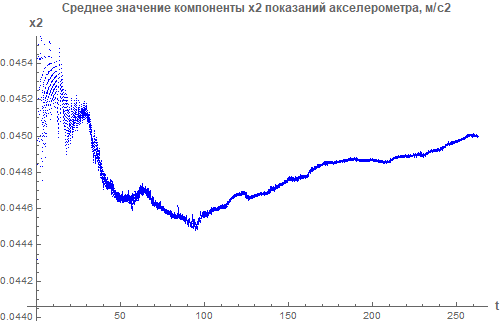

In [49]:
column = 3;
Pointsf2 = {};
Listx2 = List2[column];
AppendTo[Pointsf2, Listx2[[1]]];

For[i=2, 
    i <= Dimensions[DataGraph][[1]], 
    i++, 
    AppendTo[Pointsf2, 
            {Listx2[[i]][[1]], ((i-1)*Pointsf2[[i-1]][[2]]+Listx2[[i]][[2]])/i}]];

Show[ListPlot[Pointsf2, PlotStyle -> Blue,
            PlotLabel -> Style["Среднее значение компоненты x2 показаний акселерометра, м/с2", Bold],
            AxesLabel -> {Style["t", Medium, Bold], Style["x2", Medium, Bold]}],
     ImageSize -> 500]
Print["estimate of f2" Pointsf2[[Dimensions[DataGraph][[1]]]][[2]]]

9.8156 estimate of f3


-Graphics-
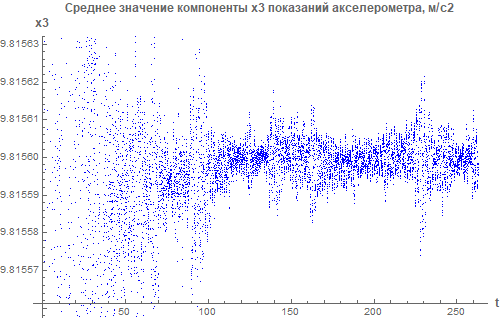

In [56]:
column = 4;
Pointsf3 = {};
Listx3 = List2[column];
AppendTo[Pointsf3, Listx3[[1]]];

For[i=2, 
    i <= Dimensions[DataGraph][[1]], 
    i++, 
    AppendTo[Pointsf3, 
            {Listx3[[i]][[1]], ((i-1)*Pointsf3[[i-1]][[2]]+Listx3[[i]][[2]])/i}]];

Show[ListPlot[Pointsf3, PlotStyle -> Blue,
            PlotLabel -> Style["Среднее значение компоненты x3 показаний акселерометра, м/с2", Bold],
            AxesLabel -> {Style["t", Medium, Bold], Style["x3", Medium, Bold]}],
     ImageSize -> 500]
Print["estimate of f3" Pointsf3[[Dimensions[DataGraph][[1]]]][[2]]]

### Графики накапливающихся средних значений показаний ДУС

3.83295 estimate of w1


-Graphics-
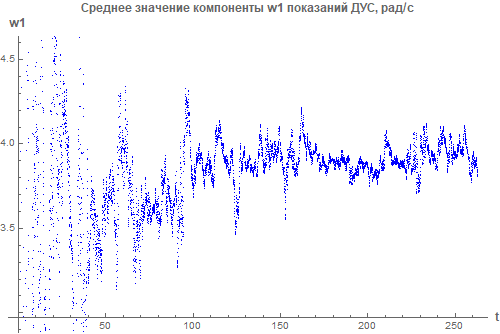

In [63]:
column = 5;
Pointsw1 = {};
Pointsw11 = {};
Listw1 = List2[column];
AppendTo[Pointsw1, Listw1[[1]]];

For[i=2, 
    i <= Dimensions[DataGraph][[1]], 
    i++, 
    AppendTo[Pointsw1, 
            {Listw1[[i]][[1]], ((i-1)*Pointsw1[[i-1]][[2]]+Listw1[[i]][[2]])/i}]];

For[i=1, i < Dimensions[Pointsw1][[1]], i++, AppendTo[Pointsw11, {Pointsw1[[i]][[1]], Pointsw1[[i]][[2]]*180/Pi*3600}]];

Show[ListPlot[Pointsw11, PlotStyle -> Blue,
            PlotLabel -> Style["Среднее значение компоненты w1 показаний ДУС, рад/с", Bold],
            AxesLabel -> {Style["t", Medium, Bold], Style["w1", Medium, Bold]}],
     ImageSize -> 500]
Print["estimate of w1" Pointsw11[[Dimensions[Pointsw11][[1]]]][[2]]]

-9.00387 estimate of w2


-Graphics-
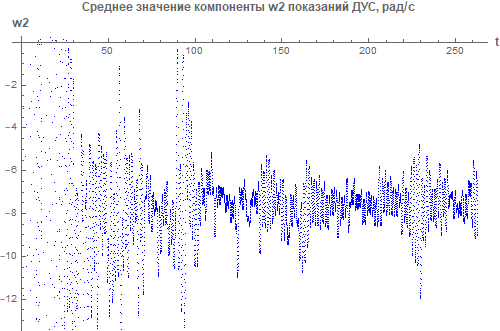

In [72]:
column = 6;
Pointsw2 = {};
Pointsw22 = {};
Listw2 = List2[column];
AppendTo[Pointsw2, Listw2[[1]]];

For[i=2, 
    i <= Dimensions[DataGraph][[1]], 
    i++, 
    AppendTo[Pointsw2, 
            {Listw2[[i]][[1]], ((i-1)*Pointsw2[[i-1]][[2]]+Listw2[[i]][[2]])/i}]];

For[i=1, i < Dimensions[Pointsw2][[1]], i++, AppendTo[Pointsw22, {Pointsw2[[i]][[1]], Pointsw2[[i]][[2]]*180/Pi*3600}]];

Show[ListPlot[Pointsw22, PlotStyle -> Blue,
            PlotLabel -> Style["Среднее значение компоненты w2 показаний ДУС, рад/с", Bold],
            AxesLabel -> {Style["t", Medium, Bold], Style["w2", Medium, Bold]}],
     ImageSize -> 500]
Print["estimate of w2" Pointsw22[[Dimensions[Pointsw22][[1]]]][[2]]]

12.5417 estimate of w3


-Graphics-
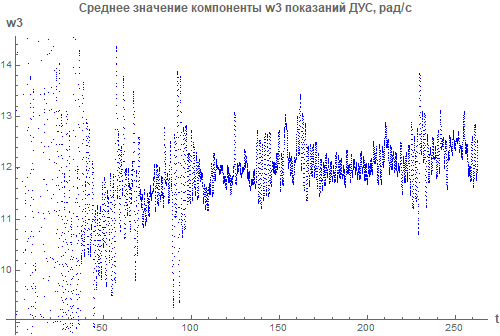

In [81]:
column = 7;
Pointsw3 = {};
Pointsw33 = {};
Listw3 = List2[column];
AppendTo[Pointsw3, Listw3[[1]]];

For[i=2, 
    i <= Dimensions[DataGraph][[1]], 
    i++, 
    AppendTo[Pointsw3, 
            {Listw3[[i]][[1]], ((i-1)*Pointsw3[[i-1]][[2]]+Listw3[[i]][[2]])/i}]];

For[i=1, i < Dimensions[Pointsw3][[1]], i++, AppendTo[Pointsw33, {Pointsw3[[i]][[1]], Pointsw3[[i]][[2]]*180/Pi*3600}]];

Show[ListPlot[Pointsw33, PlotStyle -> Blue,
            PlotLabel -> Style["Среднее значение компоненты w3 показаний ДУС, рад/с", Bold],
            AxesLabel -> {Style["t", Medium, Bold], Style["w3", Medium, Bold]}],
     ImageSize -> 500]
Print["estimate of w3" Pointsw33[[Dimensions[Pointsw33][[1]]]][[2]]]

### Графики накапливающихся среднеквадратичных отклонений показаний акселерометров

Вычисление дисперсии:

\begin{eqnarray*}
\sigma^2_{1}  = \frac{(x_0-x_1)^2}{2}.
 \end{eqnarray*}
при  $ j = 2, 3 \ldots $
\begin{eqnarray*}
\widetilde \sigma^2_{j} &=& \left(1 - \frac{1}{j}\right)\widetilde
\sigma^2_{j-1} + \frac{\left(x_{j} - \widetilde
\mu_{j-1}\right)^2}{j+1},  \quad \mbox{или}
\nonumber  \\
\widetilde \sigma^2_{j} &=& \left(1 - \frac{1}{j}\right)\widetilde
\sigma^2_{j-1} + \left(\frac{x_{j} - \widetilde
\mu_{j}}{j}\right)^2(j+1).
 \end{eqnarray*}


0.000686227 Std of f1


-Graphics-
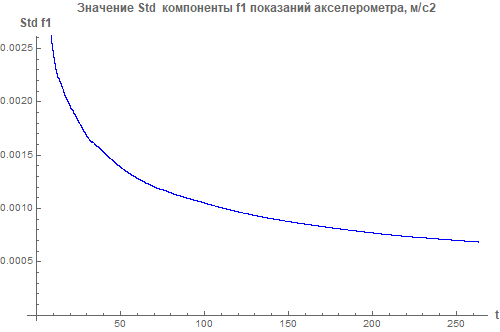

In [90]:
stdx11 = {Pointsf1[[2]][[1]], Sqrt[(Pointsf1[[1]][[2]]-Pointsf1[[2]][[2]])^2/2]};
PointStdX1 = {};
AppendTo[PointStdX1, stdx11];

For[i=3, 
    i < Dimensions[DataGraph][[1]], 
    i++, 
    AppendTo[PointStdX1, 
            {Pointsf1[[i]][[1]], Sqrt[(1 - 1/(i-1))*(PointStdX1[[i-2]][[2]])^2+((Listx1[[i]][[2]]-Pointsf1[[i-1]][[2]])/(i-1))^2]}]];

Show[ListPlot[PointStdX1, PlotStyle -> Blue,
            PlotLabel -> Style["Значение Std  компоненты f1 показаний акселерометра, м/с2", Bold],
            AxesLabel -> {Style["t", Medium, Bold], Style["Std f1", Medium, Bold]}],
     ImageSize -> 500]
Print["Std of f1" PointStdX1[[Dimensions[DataGraph][[1]]-2]][[2]]]

0.000649426 Std of f2


-Graphics-
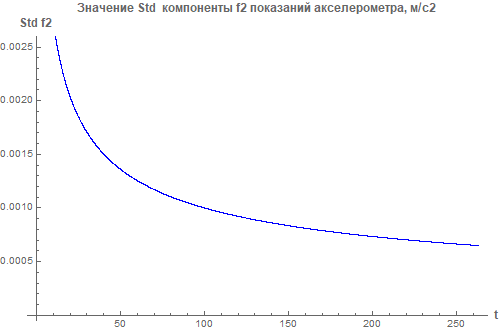

In [96]:
stdx12 = {Pointsf2[[2]][[1]], Sqrt[(Pointsf2[[1]][[2]]-Pointsf2[[2]][[2]])^2/2]};
PointStdX2 = {};
AppendTo[PointStdX2, stdx12];

For[i=3, 
    i < Dimensions[DataGraph][[1]], 
    i++, 
    AppendTo[PointStdX2, 
            {Pointsf2[[i]][[1]], Sqrt[(1 - 1/(i-1))*(PointStdX2[[i-2]][[2]])^2+((Listx2[[i]][[2]]-Pointsf2[[i-1]][[2]])/(i-1))^2]}]];

Show[ListPlot[PointStdX2, PlotStyle -> Blue,
            PlotLabel -> Style["Значение Std  компоненты f2 показаний акселерометра, м/с2", Bold],
            AxesLabel -> {Style["t", Medium, Bold], Style["Std f2", Medium, Bold]}],
     ImageSize -> 500]
Print["Std of f2" PointStdX2[[Dimensions[DataGraph][[1]]-2]][[2]]]

0.00030082 Std of f3


-Graphics-
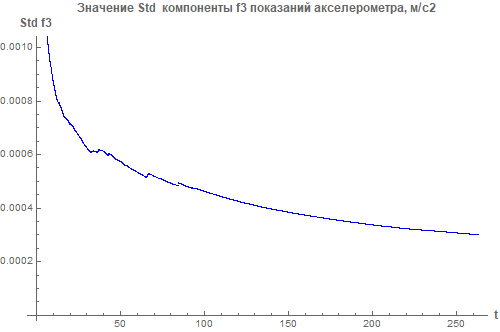

In [102]:
stdx13 = {Pointsf3[[2]][[1]], Sqrt[(Pointsf3[[1]][[2]]-Pointsf3[[2]][[2]])^2/2]};
PointStdX3 = {};
AppendTo[PointStdX3, stdx13];

For[i=3, 
    i < Dimensions[DataGraph][[1]], 
    i++, 
    AppendTo[PointStdX3, 
            {Pointsf3[[i]][[1]], Sqrt[(1 - 1/(i-1))*(PointStdX3[[i-2]][[2]])^2+((Listx3[[i]][[2]]-Pointsf3[[i-1]][[2]])/(i-1))^2]}]];

Show[ListPlot[PointStdX3, PlotStyle -> Blue,
            PlotLabel -> Style["Значение Std  компоненты f3 показаний акселерометра, м/с2", Bold],
            AxesLabel -> {Style["t", Medium, Bold], Style["Std f3", Medium, Bold]}],
     ImageSize -> 500]
Print["Std of f3" PointStdX3[[Dimensions[DataGraph][[1]]-2]][[2]]]

### Графики накапливающихся среднеквадратичных отклонений показаний ДУС

1.95558 Std of w1


-Graphics-
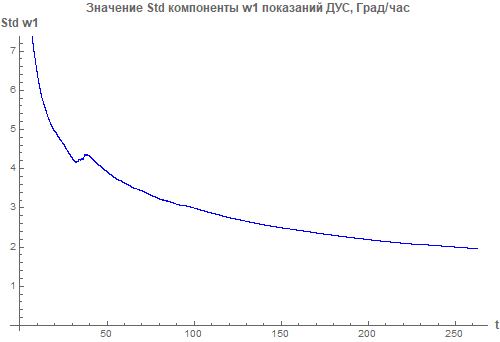

In [108]:
stdw11 = {Pointsw1[[2]][[1]], Sqrt[(Pointsw1[[1]][[2]]-Pointsw1[[2]][[2]])^2/2]};
PointStdW1 = {};
AppendTo[PointStdW1, stdw11];

For[i=3, 
    i < Dimensions[DataGraph][[1]], 
    i++, 
    AppendTo[PointStdW1, 
            {Pointsw1[[i]][[1]], Sqrt[(1 - 1/(i-1))*(PointStdW1[[i-2]][[2]])^2+((Listw1[[i]][[2]]-Pointsw1[[i-1]][[2]])/(i-1))^2]}]];

For[i=1, i < Dimensions[PointStdW1][[1]], i++, PointStdW1[[i]]= {PointStdW1[[i]][[1]], PointStdW1[[i]][[2]]*180/Pi*3600}];
Show[ListPlot[PointStdW1, PlotStyle -> Blue,
            PlotLabel -> Style["Значение Std компоненты w1 показаний ДУС, Град/час", Bold],
            AxesLabel -> {Style["t", Medium, Bold], Style["Std w1", Medium, Bold]}],
     ImageSize -> 500]
Print["Std of w1" PointStdW1[[Dimensions[DataGraph][[1]]-3]][[2]]]

19.2039 Std of w2


-Graphics-
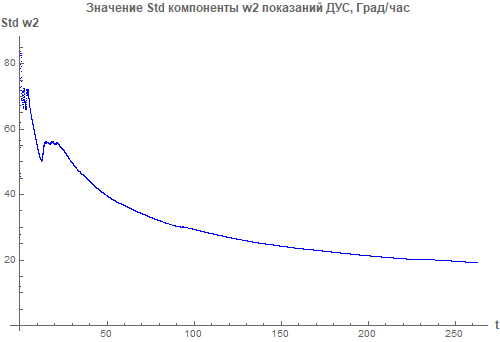

In [115]:
stdw12 = {Pointsw2[[2]][[1]], Sqrt[(Pointsw2[[1]][[2]]-Pointsw2[[2]][[2]])^2/2]};
PointStdW2 = {};
AppendTo[PointStdW2, stdw12];

For[i=3, 
    i < Dimensions[DataGraph][[1]], 
    i++, 
    AppendTo[PointStdW2, 
            {Pointsw2[[i]][[1]], Sqrt[(1 - 1/(i-1))*(PointStdW2[[i-2]][[2]])^2+((Listw2[[i]][[2]]-Pointsw2[[i-1]][[2]])/(i-1))^2]}]];

For[i=1, i < Dimensions[PointStdW2][[1]], i++, PointStdW2[[i]]= {PointStdW2[[i]][[1]], PointStdW2[[i]][[2]]*180/Pi*3600}];
Show[ListPlot[PointStdW2, PlotStyle -> Blue,
            PlotLabel -> Style["Значение Std компоненты w2 показаний ДУС, Град/час", Bold],
            AxesLabel -> {Style["t", Medium, Bold], Style["Std w2", Medium, Bold]}],
     ImageSize -> 500]
Print["Std of w2" PointStdW2[[Dimensions[DataGraph][[1]]-3]][[2]]]

7.05585 Std of w3


-Graphics-
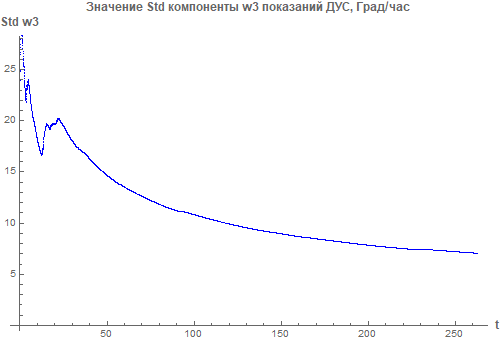

In [122]:
stdw13 = {Pointsw3[[2]][[1]], Sqrt[(Pointsw3[[1]][[2]]-Pointsw3[[2]][[2]])^2/2]};
PointStdW3 = {};
AppendTo[PointStdW3, stdw13];

For[i=3, 
    i < Dimensions[DataGraph][[1]], 
    i++, 
    AppendTo[PointStdW3, 
            {Pointsw3[[i]][[1]], Sqrt[(1 - 1/(i-1))*(PointStdW3[[i-2]][[2]])^2+((Listw3[[i]][[2]]-Pointsw3[[i-1]][[2]])/(i-1))^2]}]];

For[i=1, i < Dimensions[PointStdW3][[1]], i++, PointStdW3[[i]]= {PointStdW3[[i]][[1]], PointStdW3[[i]][[2]]*180/Pi*3600}];
Show[ListPlot[PointStdW3, PlotStyle -> Blue,
            PlotLabel -> Style["Значение Std компоненты w3 показаний ДУС, Град/час", Bold],
            AxesLabel -> {Style["t", Medium, Bold], Style["Std w3", Medium, Bold]}],
     ImageSize -> 500]
Print["Std of w3" PointStdW3[[Dimensions[DataGraph][[1]]-3]][[2]]]

### График накапливающихся среднеквадратичных отклонений модуля показаний ДУС

0.840756 Std of module w


-Graphics-
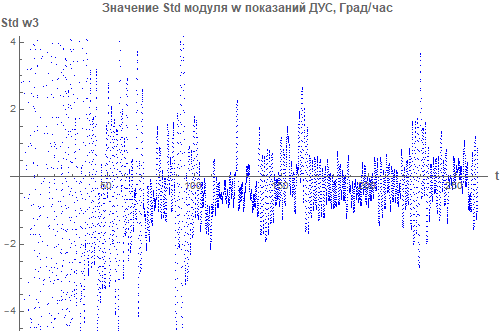

In [129]:
wMod = {};
wMod1 = {};
AppendTo[PointStdW3, stdw13];

For[i=1, 
    i < Dimensions[Pointsw1][[1]], 
    i++, 
    AppendTo[wMod, 
            {Pointsw1[[i]][[1]], (Sqrt[Pointsw1[[i]][[2]]^2+Pointsw2[[i]][[2]]^2+Pointsw3[[i]][[2]]^2]-u)}]];

For[i=1, i < Dimensions[wMod][[1]], i++, AppendTo[wMod1, {wMod[[i]][[1]], wMod[[i]][[2]]*180/Pi*3600}]];
Show[ListPlot[wMod1, PlotStyle -> Blue,
            PlotLabel -> Style["Значение Std модуля w показаний ДУС, Град/час", Bold],
            AxesLabel -> {Style["t", Medium, Bold], Style["Std w3", Medium, Bold]}],
     ImageSize -> 500]
Print["Std of module w" wMod1[[Dimensions[wMod][[1]]-1]][[2]]]